In [1]:
import pandas as pd
from plotnine import *
import numpy as np
import multiprocessing
from adjustText import adjust_text

# Figure 4: Archaelogical samples

## Fig 4A: Dog vs Human endogenous DNA source classification

In [2]:
endo_human = 0.01
endo_dog = 0.001

In [3]:
bp = "../../data/coproid_logratio/coproID_bp.csv"

In [4]:
d = pd.read_csv(bp, index_col=0)

In [5]:
d.head()

,Organism_name1,Organism_name2,Genome1_size,Genome2_size,nb_bp_aligned_genome1,nb_bp_aligned_genome2,nb_ancient_bp_aligned_genome1,nb_ancient_bp_aligned_genome2,normalized_nb_ancient_bp_aligned_genome1,normalized_nb_ancient_bp_aligned_genome2,NormalizedReadRatio_1,NormalizedReadRatio_2
Sample_name,,,,,,,,,,,,
AHP001_A0101_SG1_1_S0,Homo_sapiens,Canis_familiaris,3099922541,2327650711,65524,235200,568,24630,0.000002,0.001058,0.001732,0.998268
AHP001_B0101_SG1_1_S0,Homo_sapiens,Canis_familiaris,3099922541,2327650711,17673,585149,1606,67502,0.000005,0.002900,0.001784,0.998216
AHP002_A0101_SG1_1_S0,Homo_sapiens,Canis_familiaris,3099922541,2327650711,261762,109060,539,10938,0.000002,0.000470,0.003693,0.996307
AHP002_B0101_SG1_1_S0,Homo_sapiens,Canis_familiaris,3099922541,2327650711,25404,2290783,2558,259482,0.000008,0.011148,0.000740,0.999260
AHP003_A0101_SG1_1_S0,Homo_sapiens,Canis_familiaris,3099922541,2327650711,311418,141992,835,17368,0.000003,0.000746,0.003601,0.996399


In [6]:
d2 = pd.DataFrame()

In [7]:
d2['nnb_bp_aligned_genome1'] = (d['nb_bp_aligned_genome1']/d['Genome1_size'][0])/endo_human
d2['nnb_ancient_bp_aligned_genome1'] = (d['nb_ancient_bp_aligned_genome1']/d['Genome1_size'][0])/endo_human
d2['nnb_bp_aligned_genome2'] = (d['nb_bp_aligned_genome2']/d['Genome2_size'][0])/endo_dog
d2['nnb_ancient_bp_aligned_genome2'] = (d['nb_ancient_bp_aligned_genome2']/d['Genome2_size'][0])/endo_dog

In [8]:
new_index = []
for i in list(d2.index.str.split("_")):
    if len(i) > 1:
        new_index.append("_".join(i[0:2]))
    else:
        new_index.append(i[0])
d2['sample'] = new_index
d2.index = new_index

In [9]:
d2 = d2.filter(regex = "(AHP|ZSM|YRK).*", axis=0)

In [10]:
d2

,nnb_bp_aligned_genome1,nnb_ancient_bp_aligned_genome1,nnb_bp_aligned_genome2,nnb_ancient_bp_aligned_genome2,sample
AHP001_A0101,0.002114,0.000018,0.101046,0.010581,AHP001_A0101
AHP001_B0101,0.000570,0.000052,0.251390,0.029000,AHP001_B0101
AHP002_A0101,0.008444,0.000017,0.046854,0.004699,AHP002_A0101
AHP002_B0101,0.000820,0.000083,0.984161,0.111478,AHP002_B0101
AHP003_A0101,0.010046,0.000027,0.061002,0.007462,AHP003_A0101
AHP003_B0101,0.001666,0.000086,1.291396,0.165371,AHP003_B0101
AHP004_A0101,0.012539,0.000029,0.007572,0.000907,AHP004_A0101
AHP004_B0101,0.000446,0.000001,0.020297,0.002432,AHP004_B0101
YRK001_A0101,0.001532,0.000261,8.301168,0.091704,YRK001_A0101
ZSM002,0.001854,0.000331,18.971657,0.288883,ZSM002


In [11]:
d2['all_orga'] = np.where(d2['nnb_bp_aligned_genome1'] > d2['nnb_bp_aligned_genome2'], 'Homo sapiens', 'Canis familiaris')

In [12]:
d2['ancient_orga'] =  np.where(d2['nnb_ancient_bp_aligned_genome1'] > d2['nnb_ancient_bp_aligned_genome2'], 'Homo sapiens', 'Canis familiaris')

In [13]:
d2['all_log_ratio'] = np.log2(d2['nnb_bp_aligned_genome1']/d2['nnb_bp_aligned_genome2'])
d2['pmd_log_ratio'] = np.log2(d2['nnb_ancient_bp_aligned_genome1']/d2['nnb_ancient_bp_aligned_genome2'])

In [19]:
d2['PMD change'] = np.where((np.sign(d2['all_log_ratio']) != np.sign(d2['pmd_log_ratio'])), 'changed','not changed')

In [22]:
d2['grepel_name'] = np.where(d2['PMD change'] == 'changed',d2.index, None)

In [25]:
d3 = d2['nnb_bp_aligned_genome1'].append(d2['nnb_ancient_bp_aligned_genome1']).to_frame('aligned_human')
d3['aligned_dog'] = d2['nnb_bp_aligned_genome2'].append(d2['nnb_ancient_bp_aligned_genome2'])
d3['al_type']=['None']*d2.shape[0]+['PMD filtered']*d2.shape[0]

In [26]:
d3['sample'] = d3.index

In [27]:
d3.head()

,aligned_human,aligned_dog,al_type,sample
AHP001_A0101,0.002114,0.101046,None,AHP001_A0101
AHP001_B0101,0.000570,0.251390,None,AHP001_B0101
AHP002_A0101,0.008444,0.046854,None,AHP002_A0101
AHP002_B0101,0.000820,0.984161,None,AHP002_B0101
AHP003_A0101,0.010046,0.061002,None,AHP003_A0101


In [28]:
d3['log_ratio'] = np.log2(d3['aligned_human']/d3['aligned_dog'])

In [29]:
d3['organism'] = np.where(d3['log_ratio'] > 0, 'Homo sapiens', 'Canis familiaris')

/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:706: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:707: PlotnineWarning: Filename: ./results/figure4A_version1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


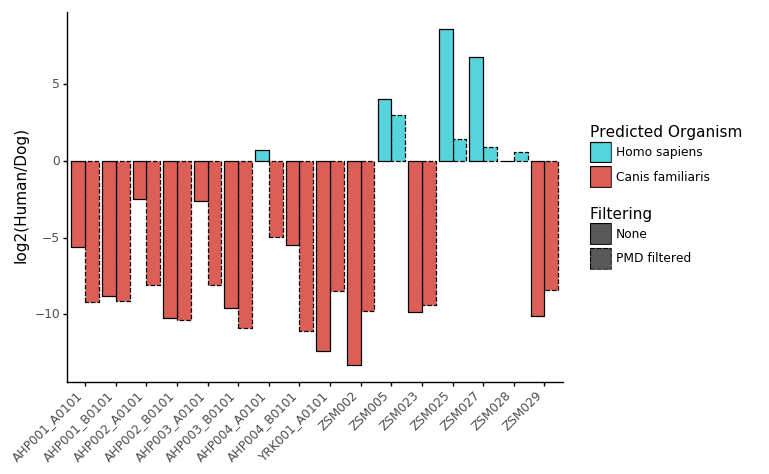

<ggplot: (8794228054045)>

In [64]:
p = ggplot(d3, aes(x='sample', y='log_ratio')) + geom_bar(aes(linetype='al_type', fill='organism'), stat='identity', position = 'dodge', color = 'black') 
p = p + theme_classic() + theme(axis_text_x=element_text(angle=45, hjust=1)) + scale_fill_discrete(name='Predicted Organism') 
p = p + scale_linetype_manual(name='Filtering', values={'None':'solid', 'PMD filtered':'dashed'})
p = p + labs(x='',y='log2(Human/Dog)')
p = p + guides(fill = guide_legend(reverse = True))
p.save("./results/figure4A_version1.png", dpi=300)
p

/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:706: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:707: PlotnineWarning: Filename: ./results/figure4A_version2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


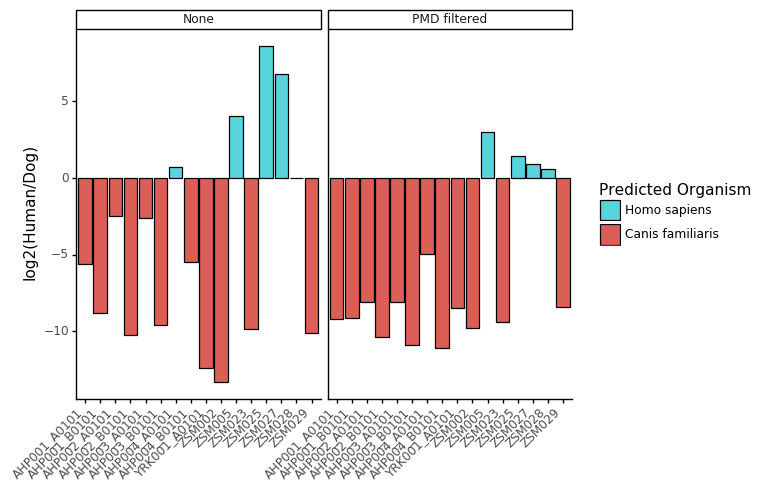

<ggplot: (8794228563236)>

In [63]:
p = ggplot(d3, aes(x='sample', y='log_ratio')) + geom_bar(aes(fill='organism'), stat='identity', color='black') 
p = p + theme_classic() + theme(axis_text_x=element_text(angle=45, hjust=1)) + scale_fill_manual(name='Predicted Organism', values={'Homo sapiens':'#57d3db','Canis familiaris':'#db5f57'}) 
p = p + facet_wrap('~al_type')
p = p + labs(x='',y='log2(Human/Dog)')
p = p + guides(fill = guide_legend(reverse = True))
p.save("./results/figure4A_version2.png", dpi=300)
p

In [32]:
d4 = d3

In [33]:
d4['log_aligned_human'] = np.log10(d4['aligned_human'])
d4['log_aligned_dog'] = np.log10(d4['aligned_dog'])

In [37]:
d3['grepel_name'] = d3.index.map(d2['grepel_name'])

/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/scales/scales.py:28: PlotnineWarning: Scale for 'color' is already present.
Adding another scale for 'color',
which will replace the existing scale.

  warn(_TPL_DUPLICATE_SCALE.format(ae), PlotnineWarning)
/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:706: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:707: PlotnineWarning: Filename: ./results/figure4A_version3.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/layer.py:453: PlotnineWarning: geom_text : Removed 28 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/projects1/users/borry/15_miniconda3/

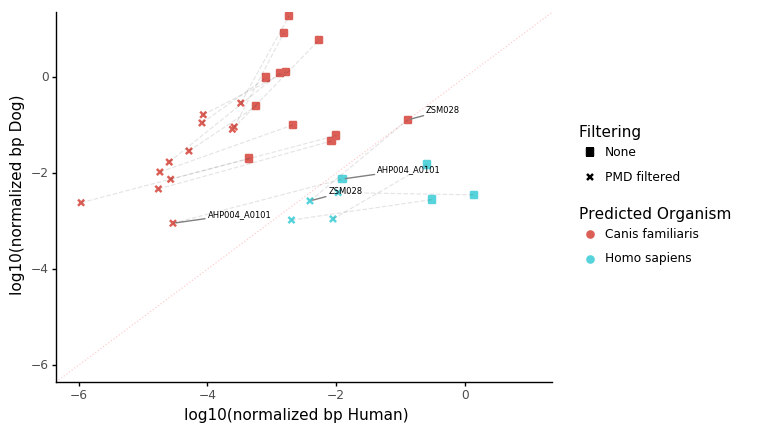

<ggplot: (-9223363242626675957)>

In [58]:
p = ggplot(d3, aes(x='log_aligned_human', y='log_aligned_dog', label='grepel_name')) + geom_abline(intercept=0, slope=1, color='red', alpha=0.2, linetype='dotted') 
p = p + geom_point(aes(color='organism', shape='al_type'), stroke=1)
p = p + geom_line(aes(group='sample'), alpha=0.1, linetype='dashed')
p = p + scale_color_discrete(name='organism') + theme_classic()
p = p + geom_text(size=6, adjust_text= {
    'expand_points': (2, 2),
    'expand_objects': (1.5, 2),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'grey'
    },
    'on_basemap':True
}) 
# p = p + geom_text(size=6, nudge_y=0.16, ha='right')
p = p + scale_shape_manual(name='Filtering', values={'None':'s', 'PMD filtered':'x'})
p = p + scale_color_discrete(name='Predicted Organism')
p = p + labs(x='log10(normalized bp Human)', y = 'log10(normalized bp Dog)')
p = p + coord_cartesian(xlim=[-6,1],ylim=[-6,1])
p.save("./results/figure4A_version3.png", dpi=300)
p

/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/scales/scales.py:28: PlotnineWarning: Scale for 'color' is already present.
Adding another scale for 'color',
which will replace the existing scale.

  warn(_TPL_DUPLICATE_SCALE.format(ae), PlotnineWarning)
/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:706: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:707: PlotnineWarning: Filename: ./results/figure4A_version4.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/layer.py:453: PlotnineWarning: geom_text : Removed 28 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/projects1/users/borry/15_miniconda3/

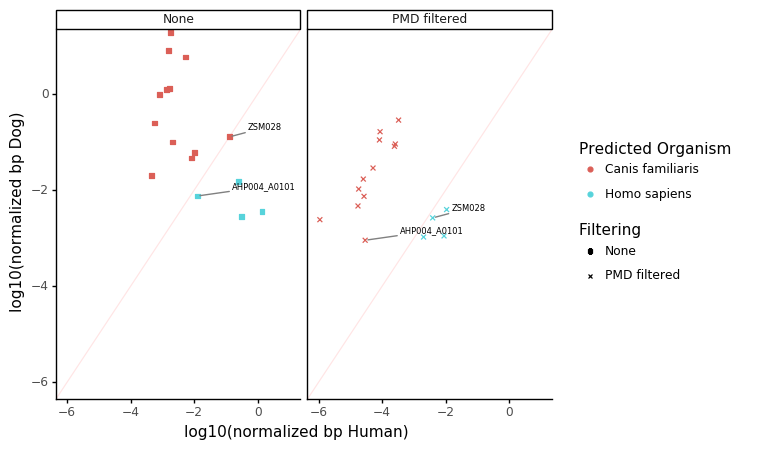

<ggplot: (8794229208675)>

In [47]:
p = ggplot(d3, aes(x='log_aligned_human', y='log_aligned_dog', label='grepel_name')) + geom_abline(intercept=0, slope=1, color='red', alpha=0.1) + geom_point(aes(color='organism', shape = 'al_type'))
p = p + scale_color_discrete(name='organism') + theme_classic()
p = p + geom_text(size=6, adjust_text= {
    'expand_points': (2, 2),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'grey'
    },
    'on_basemap':True
}) 
p = p + facet_wrap('~al_type')
p = p + scale_color_discrete(name='Predicted Organism')
p = p + scale_shape_manual(name='Filtering', values={'None':'s', 'PMD filtered':'x'})
p = p + labs(x='log10(normalized bp Human)', y = 'log10(normalized bp Dog)')
p = p + coord_cartesian(xlim=[-6,1],ylim=[-6,1])
p.save("./results/figure4A_version4.png", dpi=300)
p

/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:706: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:707: PlotnineWarning: Filename: ./results/figure4A_version5.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


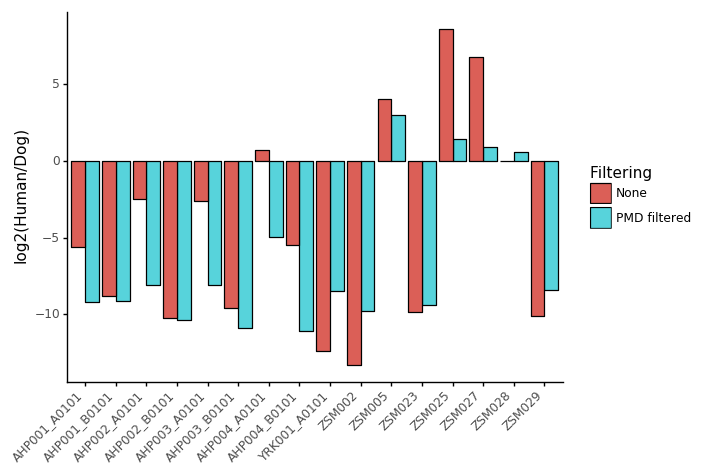

<ggplot: (-9223363250938897271)>

In [302]:
p = ggplot(d3, aes(x='sample', y='log_ratio')) + geom_bar(aes(fill='al_type'), stat='identity', position = 'dodge', color = 'black') 
p = p + theme_classic() + theme(axis_text_x=element_text(angle=45, hjust=1)) + scale_fill_discrete(name='Filtering')
p = p + labs(x='',y='log2(Human/Dog)')
p.save("./results/figure4A_version5.png", dpi=300)
p

## Fig 4b: t-SNE embedding with archaelogical samples

In [189]:
s = "../../data/sourcepredict/sourcepredict_embedding.csv"
s_pred = "../../data/sourcepredict/prediction_sourcepredict.csv"

In [187]:
sp = pd.read_csv(s, index_col=0)

In [199]:
spp = pd.read_csv(s_pred, index_col=0).T

In [227]:
conditions = [(spp['Canis_familiaris'] > 0.5) ,
              (spp['Homo_sapiens'] > 0.5),
              (spp['Soil'] > 0.5),
              (spp['unknown'] > 0.5)
             ]
choices = ['Canis familiaris', 'Homo sapiens', 'Soil', 'Unknown']
spp['Predicted organism'] = np.select(conditions, choices, default='Unknown')

In [228]:
spp.head()

,Canis_familiaris,Homo_sapiens,Soil,unknown,Predicted organism
AHP003_A0101_SG1_1_S0,0.041471,0.019724,0.606175,0.332630,Soil
CMN001_D0101_SG1_1_S0,0.042145,0.020045,0.616032,0.321778,Soil
ZSM005,0.050077,0.923168,0.014144,0.012610,Homo sapiens
ZSM002,0.050012,0.921973,0.014126,0.013889,Homo sapiens
AHP003_B0101_SG1_1_S0,0.038788,0.018448,0.566964,0.375799,Soil


In [229]:
sp['organism'] = sp.drop(spp.index, axis=0)['labels'].append(spp['Predicted organism'])

In [230]:
sp['ml'] = np.where(sp['labels'] == 'sink', 'predicted', 'reference')

In [251]:
sp['organism'].value_counts()

Homo sapiens        269
Canis familiaris    151
Soil                 33
Unknown               3
Name: organism, dtype: int64

In [231]:
sp['organism'] = sp['organism'].str.replace('_'," ")

/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:706: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/envs/coproid_article/lib/python3.6/site-packages/plotnine/ggplot.py:707: PlotnineWarning: Filename: results/figure4B.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


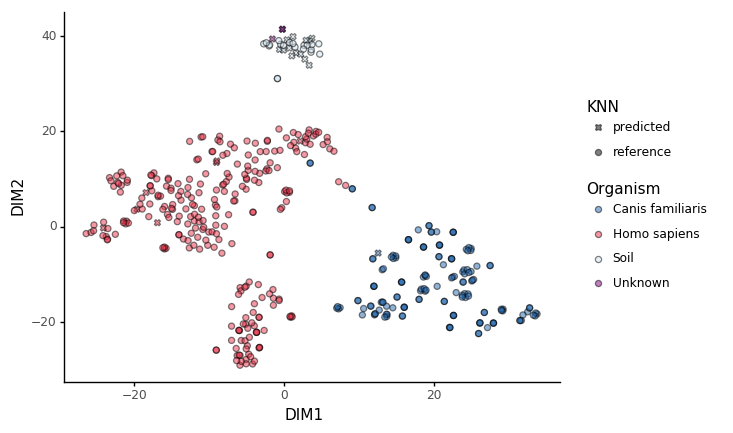

<ggplot: (8785916619731)>

In [259]:
p = ggplot(sp, aes(x='PC1',y='PC2')) + geom_point(aes(fill='organism', shape='ml'), stroke=0.5, alpha=0.5, color='black', size = 2)
p = p + scale_shape_manual(name='KNN', values={'predicted':'X', 'reference':'o'}) + theme_classic() + labs(x='DIM1',y='DIM2')
p = p + scale_fill_manual(name = 'Organism', values = {"Canis familiaris":"#2166ac","Homo sapiens":"#ea334a", "Soil":"#d1e5f0", 'Unknown':'purple'})
p.save("results/figure4B.png", dpi=300)
p